Downloading Dataset

In [110]:
import yfinance as yf

In [111]:
sp500=yf.Ticker("^GSPC")
sp500=sp500.history(period="max")

In [112]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,0.0,0.0
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,0.0,0.0


Data Processing

In [113]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-18 00:00:00-04:00', '2024-09-19 00:00:00-04:00',
               '2024-09-20 00:00:00-04:00', '2024-09-23 00:00:00-04:00',
               '2024-09-24 00:00:00-04:00', '2024-09-25 00:00:00-04:00',
               '2024-09-26 00:00:00-04:00', '2024-09-27 00:00:00-04:00',
               '2024-09-30 00:00:00-04:00', '2024-10-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24304, freq=None)

<Axes: title={'center': 'S&P 500 Index'}, xlabel='Date', ylabel='Price'>

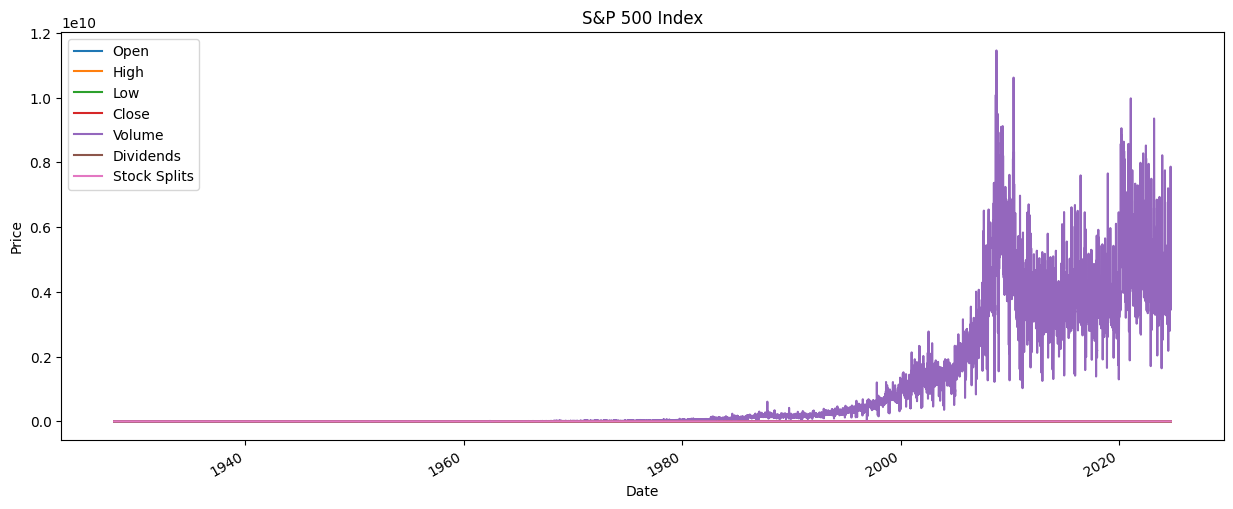

In [114]:
sp500.plot.line(figsize=(15,6),ylabel="Price",xlabel="Date",title="S&P 500 Index")

In [115]:
#deleting the dividends and stocks splits column
del sp500["Dividends"]
del sp500["Stock Splits"]

In [116]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500
#assigning the next day price as tomorrow column to predict

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,5762.479980


In [117]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [118]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117,1
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922,0
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,5762.479980,1


In [119]:
#didn't want to look to far
sp500=sp500.loc["1990-01-01":].copy()

In [120]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117,1
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922,0
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,5762.479980,1


Training the model using Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=100,min_samples_split=100)
#as time series data so don't used direct split
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100)

Accuracy Measurement

In [122]:
import pandas as pd

In [123]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])
preds=pd.Series(preds,index=test.index)


In [124]:
preds

,0
Date,
2024-05-09 00:00:00-04:00,0
2024-05-10 00:00:00-04:00,0
2024-05-13 00:00:00-04:00,0
2024-05-14 00:00:00-04:00,0
2024-05-15 00:00:00-04:00,0
...,...
2024-09-25 00:00:00-04:00,0
2024-09-26 00:00:00-04:00,0
2024-09-27 00:00:00-04:00,0


In [125]:
precision_score(test["Target"],preds,average='micro')

0.4

<Axes: xlabel='Date'>

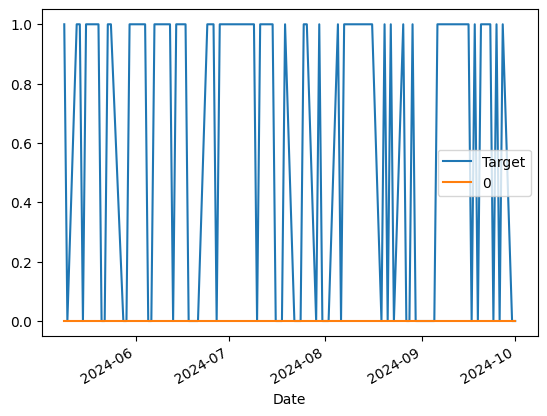

In [126]:
combined=pd.concat([test["Target"],preds],axis=1)
combined.plot()

Backtesting Model

In [127]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined


In [128]:
#each year has 250 trading days for 10 years 2500 than 11 years 2750
def backtest(data,model,predictors,start=2500,step=250):
  all_predictions=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [129]:
predictions=backtest(sp500,model,predictors)

In [130]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3623
1,2631


In [131]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5328772329912581

In [132]:
predictions["Target"].value_counts()/predictions.shape[0]

,count
Target,
1,0.535657
0,0.464343


Additional Predictors in model

In [133]:
#to look that stocks are improving 2 days , last week,last 12 weeks, last year,last 4 years
horizons=[2,5,60,250,1000]
new_predictors=[]
for horizon in horizons:
  rolling_averages=sp500.rolling(horizon).mean()

  ratio_column=f"Close_Ratio_{horizon}"
  sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]
  trend_column=f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
  new_predictors+=[trend_column]

In [134]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117,1,0.999069,1.0,1.000747,3.0,1.033954,36.0,1.133125,147.0,1.309463,528.0
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922,0,1.002015,1.0,1.003675,3.0,1.037391,36.0,1.136400,147.0,1.314048,528.0
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,5762.479980,1,0.999373,1.0,1.001171,3.0,1.035464,35.0,1.133675,147.0,1.311688,528.0


In [135]:
data_new=sp500.copy()
data_new

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117,1,0.999069,1.0,1.000747,3.0,1.033954,36.0,1.133125,147.0,1.309463,528.0
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922,0,1.002015,1.0,1.003675,3.0,1.037391,36.0,1.136400,147.0,1.314048,528.0
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,5762.479980,1,0.999373,1.0,1.001171,3.0,1.035464,35.0,1.133675,147.0,1.311688,528.0


In [136]:
data_new=data_new.dropna()

In [137]:
data_new

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,5722.259766,0,1.001254,2.0,1.006273,3.0,1.036653,37.0,1.136541,148.0,1.312617,528.0
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,5745.370117,1,0.999069,1.0,1.000747,3.0,1.033954,36.0,1.133125,147.0,1.309463,528.0
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,5738.169922,0,1.002015,1.0,1.003675,3.0,1.037391,36.0,1.136400,147.0,1.314048,528.0


improvement in model to use new values

In [138]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [139]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined


In [140]:
predictions=backtest(data_new,model,new_predictors)

In [142]:
predictions["Predictions"].value_counts()
#we reduce the days to buy stock so that only on more confident days we can buy stocks

,count
Predictions,
0.0,4316
1.0,937


In [143]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5773745997865528